# Statistics in Python

In this hands-on activity, we're going to learn how to conduct foundational, descriptive, and inferential statistics in Python. Using user review data from Google and Apple, we'll analyse different components of the data to gain a better understanding of the differences between the two companies and how customers perceive the performance of their apps. 

### Research Question/Brief

Did Apple Store apps receive different user ratings than Google Play apps?

## Activity Goals
After we load and clean our data, we'll do the following:

1. Foundations
    - Identify levels of measurement for our variables of interest
    - Visualize the distributions of our data
2. Descriptive statistics
    - Calculate and interpret measures of central tendency and spread for our variables of interest
3. Inferential statistics 
    - Restate the formulated hypotheses and determine significance level
    - T-tests and other statistical tests

## Import Libraries & Load Data
To get started, we first need to import our relevant Python libraries, as well as load in our datasets.

In [2]:
# Import the usual suspects for data manipulation, statistics, and visualisations.
import pandas as pd # used to "tidy" up and manipulate our data
import numpy as np # used for matrix and numerical calculations; foundation of pandas
from scipy import stats # contains stats functions and is used to visualise probability distributions
import matplotlib.pyplot as plt # used for visualisations
import seaborn as sns # a more user-friendly library used for visualisations

The data we'll be using today is from Kaggle. Kaggle is an excellent repository of data and various data-driven competitions that people all over the world can compete in. The original data from the Google Store is [here](https://www.kaggle.com/lava18/google-play-store-apps) and the original data from Apple Store is [here](https://www.kaggle.com/ramamet4/app-store-apple-data-set-10k-apps). 

For today's workshop, the data have already been cleaned and merged into one neat file. Let's download the combined datasets and save them to the Desktop. You can access them [here](https://github.com/DecodedCo/data-fellowship/tree/master/data).

For the purposes of this exercise, we'll focus specifically on a few of the variables from each dataset that are of interest for answering our brief.
- Category 
- Rating
- Reviews
- Price 

Let's load in the dataset and take a look at each of these columns. 

In [3]:
# Load the data into a pandas dataframe called 'df' using pandas read_csv
df = pd.read_csv("apple_google_merged.csv", index_col=0)

# Let's observe the first three entries
df.head()

,Category,Rating,Reviews,Price,platform
0,ART_AND_DESIGN,4.1,159,0.0,google
1,ART_AND_DESIGN,3.9,967,0.0,google
2,ART_AND_DESIGN,4.7,87510,0.0,google
3,ART_AND_DESIGN,4.5,215644,0.0,google
4,ART_AND_DESIGN,4.3,967,0.0,google


## 1. Foundations  
In this section of the workshop, we'll cover some of the basics associated with statistics. First, let's take a look at how some of our variables are measured and what their data types are. We can do this quickly by using the `.info()` function.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15634 entries, 0 to 18036
Data columns (total 5 columns):
Category    15634 non-null object
Rating      15634 non-null float64
Reviews     15634 non-null int64
Price       15634 non-null float64
platform    15634 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 732.8+ KB


Based on the output, we can see that are variables are various data types. Most importantly, some of them are floats, while some of them are integers. For example, the variable 'Reviews' is an integer, which means it's a whole number. However, the 'Rating' variable is a float, which means it can have decimal points.  

For our brief, we are primarily concerned with the **ratings** given to Apple and Google. We can get a better feel for how the variable 'Rating' is measured by using the `.unique()` and `.value_counts()` functions.

In [5]:
df['Rating'].unique()

array([4.1, 3.9, 4.7, 4.5, 4.3, 4.4, 3.8, 4.2, 4.6, 3.2, 4. , 4.8, 4.9,
       3.6, 3.7, 3.3, 3.4, 3.5, 3.1, 5. , 2.6, 3. , 1.9, 2.5, 2.8, 2.7,
       1. , 2.9, 2.3, 2.2, 1.7, 2. , 1.8, 2.4, 1.6, 2.1, 1.4, 1.5, 1.2])

In [6]:
df['Rating'].value_counts()

4.5    3701
4.0    2194
4.4    1109
4.3    1076
4.2     952
3.5     865
4.6     823
5.0     766
4.1     708
4.7     499
3.0     466
3.9     386
3.8     303
3.7     239
4.8     234
2.5     217
3.6     174
3.4     128
2.0     118
3.3     102
4.9      87
3.1      69
3.2      64
1.0      60
1.5      59
2.9      45
2.8      42
2.6      25
2.7      25
2.3      20
2.4      19
2.2      14
1.9      13
1.8       8
1.7       8
2.1       8
1.6       4
1.4       3
1.2       1
Name: Rating, dtype: int64

We can see that the variable 'Rating' is a continuous variable, but we can't tell much beyond that. To glean more insight, let's use the `.describe` function on the 'Rating' variable.

In [7]:
df["Rating"].describe()

count    15634.000000
mean         4.134802
std          0.612953
min          1.000000
25%          4.000000
50%          4.300000
75%          4.500000
max          5.000000
Name: Rating, dtype: float64

The variable ranges from 1 to 5, with a mean of 4.13. However, we don't know how this differs between the two companies we are analysing! Let's use the `.groupby()` function in tandem with the `.describe()` function to get some more information on ratings for Apple and Google. 

In [8]:
df.groupby(by='platform')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
apple,6268.0,4.049697,0.726943,1.0,4.0,4.5,4.5,5.0
google,9366.0,4.191757,0.515219,1.0,4.0,4.3,4.5,5.0


It seems that the data we are most interested in - the ratings among users for each platform - are _continuous_. It also appears that the data have a discernable order and are measured in _intervals_, with a rating of 1 being the lowest and a rating of 5 being the highest. With this information in hand, we can explore the descriptive statistics of our data, specifically the ratings among users of Google and Apple apps.

### Visualising distributions
We can also visualise our variables by using the `Seaborn` package. Visualising our data helps us understand the distributions of the data points, which in turn helps us make decisions about how we test our hypotheses, etc. 

We'll use the `distplot` to create a figure that shows the shape of our data. We can do this for our overall data, as well as for the variables in our dataset. Like we've done above, we'll focus on the 'Ratings' variable since it's our variable of interest for our brief.

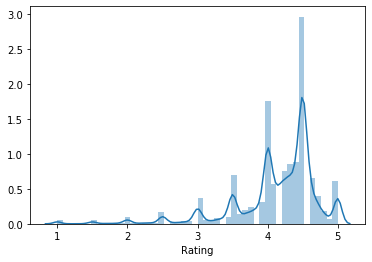

In [9]:
sns.distplot(df['Rating'], hist=True, rug=False)

Text(0, 0.5, 'Density')

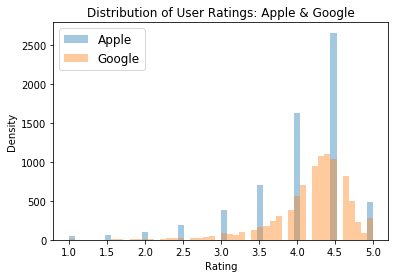

In [10]:
apple = df[df.platform == 'apple']
google = df[df.platform == 'google']

sns.distplot(apple['Rating'], hist = True, kde = False, label='Apple')
sns.distplot(google['Rating'], hist = True, kde = False, label='Google')

# Plot formatting
plt.legend(prop={'size': 12})
plt.title('Distribution of User Ratings: Apple & Google')
plt.xlabel('Rating')
plt.ylabel('Density') 

## 2. Descriptive Statistics 
In this section of the workshop, we'll explore the descriptive statistics of our dataset. You'll cover descriptive statistics in more depth in your online practice, but here we'll cover measures of central tendency, as well as visualise the distributions of our data. 

Let's start by using the `.describe` function again on our data, which will easily return calculations like the mean, standard deviation, and min/max for each of the variables in our dataset.

In [11]:
df.describe()

,Rating,Reviews,Price
count,15634.000000,1.563400e+04,15634.000000
mean,4.134802,3.138916e+05,1.306140
std,0.612953,2.446250e+06,12.848935
min,1.000000,1.000000e+00,0.000000
25%,4.000000,1.150000e+02,0.000000
50%,4.300000,1.628000e+03,0.000000
75%,4.500000,2.814825e+04,0.000000
max,5.000000,7.815831e+07,400.000000


### Measures of Central Tendency 
In addition to the `.describe()` function, there are a number of other built-in functions provided by the `pandas` library that help us obtain our measures of central tendency. We can pull out a number of useful descriptive statistics by calling any of the variables in our dataset and then adding the measure of central tendency to the end.

How would we compute these without the `pandas` functions?

In [8]:
# Median
df['Rating'].median()

4.3

In [9]:
# Mean
df['Rating'].mean()

4.134802353844186

In [10]:
# Mode
df['Rating'].mode()

0    4.5
dtype: float64

What if we wanted to get the measures of central tendency, but grouped by the platform (e.g., Google or Apple)? We can use the `.groupby()` function again to do this. Like before, we can find the mean, median, and mode for the 'Rating' variable for users of the Apple and Google apps. 

In [25]:
# Mean by group
df.groupby(by='platform')['Rating'].mean()

platform
apple     4.049697
google    4.191757
Name: Rating, dtype: float64

In [28]:
# Median by group
df.groupby(by='platform')['Rating'].median()

platform
apple     4.5
google    4.3
Name: Rating, dtype: float64

In [29]:
# Mode by group
df.groupby(by='platform')['Rating'].agg(pd.Series.mode)

platform
apple     4.5
google    4.4
Name: Rating, dtype: float64

Based on these results, we can tentatively identify a few trends in the app data. If we're basing our evaluations on the mean, it appears Google has better average app ratings than Apple does. However, if we base our evaluations on the median (which isn't sensitive to outliers like the mean), it appears Apple has higher user ratings. Overall, both platforms seem to receive pretty decent ratings based on the mode (4.5 for Apple and 4.4 for Google, respectively).

### Measures of Spread
We also need to know how much spread/deviation/variation there is in our data. The measures of central tendency that we've calculated for both platforms are similar, so it will be useful to dig a little deepter to understand how dispersed our data points are among users who provide app ratings for Google and Apple.

In [37]:
# Range
df['Rating'].max()-df['Rating'].min()

4.0

 We also need to know how much variation there is around the mean of our data. The **variance** gives us the mathematical dispersion of the data relative to the mean. However, the units aren't great for comparison because they're squared, so we also rely on the standard deviation. **Standard deviation** is the square root of the variance and gives a value that's on the same scale as the original values, which helps with interpretation. Like before, we can use the built-in `pandas` functions to get these values. 
 
 How would we compute these without the `pandas` functions?

In [13]:
# Variance
df['Rating'].var()

0.3757112543512684

In [42]:
# Standard deviation
df['Rating'].std()

0.6129528973349163

While informative, this doesn't tell us much about the spread of the data based on our two platforms, Apple and Google. For example, it's the case that the mode for both groups are similar, but is it also the case that the standard deviation of ratings are similar between Apple and Google? Let's take a closer look at some of the metrics by group.

In [38]:
df.groupby(by='platform')['Rating'].max()-df['Rating'].min()

platform
apple     4.0
google    4.0
Name: Rating, dtype: float64

In [39]:
# Variance by group
df.groupby(by='platform')['Rating'].var()

platform
apple     0.528446
google    0.265450
Name: Rating, dtype: float64

In [40]:
# Standard deviation by group
df.groupby(by='platform')['Rating'].std()

platform
apple     0.726943
google    0.515219
Name: Rating, dtype: float64

When grouped by app platform, the measures of spread aluminate the differences between Apple and Google user ratings. For example, when the standard deviation is small, it means the data points are grouped closer to the mean, while a larger standard deviation means they're more dispersed. In this case, there is more variability among the ratings provided by Apple users than there are for Google users. Recall that our group means are somewhat similar (4.04 for Apple and 4.19 for Google), so analysing the spread gives us a better idea of how close to the mean each group's user ratings are. It also suggests there are fewer higher and lower rating values among Google users when compared to Apple users. 

We can visualise the spread of our data using a boxplot from the `seaborn` package. The length of the blue box, for example, represents the interquartile range of the Google users, with the middle line denoting the median. The "whiskers" are the lines coming off of each side of the box, which represent the minimum to the median value (the 1st quartile/25th percentile) and the median to the maximum value (the 3rd quartile/75th percentile). Outliers are outside of the whiskers.

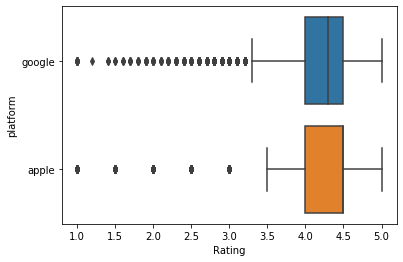

In [46]:
sns.boxplot(x=df['Rating'], y=df['platform'])

## 3. Inferential Statistics
Finally, we'll use inferential statistics to make generlizations about our data samples to the larger population. The first step in this process is to define the hypotheses that we want to test. Let's formulate a null and an alternative hypothesis for the question from our brief.

**H<sub>null</sub>**: The average user ratings of Apple and Google users are equal (e.g., there is no difference between the two). 

**H<sub>alternative</sub>**: The average user ratings of Apple users is different than that of Google users. 

Next, we'll determine the significance level. While this differs among disciplines, the conventional level is 95% with a p-value < .05.

**Significance level**: 0.05

Now that the hypotheses and significance levels are defined, we are going to try to reject or accept the null hypothesis by using statistical tests. We'll start with the [Student's t-test](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test), which is derived from the t-distribution, to evaluate differences between two independent groups. For our brief, we'll conduct a Student's t-test using the `stats.ttest_ind` function to compare the differences between Apple and Google user ratings.

In [48]:
# Create subsets of the column 'Rating' by the different platforms so we can do a t-test. 
apple = df[df['platform']== 'apple']['Rating']
google = df[df['platform']== 'google']['Rating']

In [67]:
# Run a Student's t-test
t_test =stats.ttest_ind(apple, google)

# Check summary results
t_test

Ttest_indResult(statistic=-14.294169045166113, pvalue=4.642189615775503e-46)

In [55]:
# Let's use an if-else statement to spit out a coherent result for us
if t_test.pvalue < 0.05:
    print('The p-value is', t_test.pvalue,
          'so the observed differences are very unlikely to be due to chance. We reject the null hypothesis.')
else:
    print('The p-value is', t_test.pvalue,
          'so the observed differences are likely to be due to chance. We accept the null hypothesis.')

The p-value is 4.642189615775503e-46 so the observed differences are very unlikely to be due to chance. We reject the null hypothesis.


The results from our Student's t-test - specifically, the very small p-value - suggest that we can reject the null hypothesis that there are not significant differences between Apple and Google users and their app ratings. However, there are a number of assumptions that are built into the Student's t-test (you can read more [here](https://en.wikipedia.org/wiki/Student%27s_t-test#Independent_two-sample_t-test)). This test assumes that the variances between groups are equal. As we discovered while exploring our descriptive statistics, this isn't the case. To get around this assumption, we can use a Welch’s t-test from the `stats.ttest` function we used above, which doesn't make this assumption if we set the parameter `equal_var` to `False`.

In [56]:
# Run a Welch's t-test (unequal variances)
welch = stats.ttest_ind( apple, google, equal_var= False)
if welch.pvalue < 0.05:
    print('The p-value is', welch.pvalue,
          'so the observed differences are very unlikely to be due to chance. We reject the null hypothesis.')
else:
    print('The p-value is', welch.pvalue,
          'so the observed differences are likely to be due to chance. We accept the null hypothesis.')

The p-value is 1.607484672627137e-40 so the observed differences are very unlikely to be due to chance. We reject the null hypothesis.


Good news! After running the Welch's t-test, our suspicions are still confirmed: there are differences between Apple and Google user ratings. Unfortunately, there are even more assumptions that both the Student's and Welch's t-test make about the data. Importantly, both tests assume that the distribution of the data is normal. We know from our figures in the descriptive statistics section that the distribution is _somewhat_ normal, though skewed. We can conduct a more formal test using the function `stats.normaltest` to confirm this. The null hypothesis of the normality test is that the data is normally distributed. 

In [61]:
# Save result in a variable called 'apple_normal'
apple_normal = stats.normaltest(apple)
apple_normal

NormaltestResult(statistic=1778.9974234584017, pvalue=0.0)

In [62]:
# Save result in a variable called 'google_normal'
google_normal = stats.normaltest(google)
google_normal

NormaltestResult(statistic=3678.6157187516856, pvalue=0.0)

The p-values from our normality tests are both zero, which means we can reject the null and conclude that the data for both groups is not normally distributed (you can also use a histogram to see the distribution of the data with the code `plt.hist`). 

As you may have guessed by now, there is a test for when this occurs! These are called **non-parametric tests**, which means the assumtions about normality and equal variances are relaxed so that we can test for group differences. The equivalent non-parametric version of a Student's t-test is the Mann-Whitney U Test. To conduct this, we can use the function `stats.mannwhitneyu`. 

In [64]:
# Run a Mann-Whitney U Test (non-parametric)
mann_whitney = stats.mannwhitneyu(apple, google)
if mann_whitney.pvalue < 0.05:
    print('The p-value is', mann_whitney.pvalue,
          'so the observed differences are very unlikely to be due to chance. We reject the null hypothesis.')
else:
    print('The p-value is', mann_whitney.pvalue,
          'so the observed differences are likely to be due to chance. We accept the null hypothesis.')

The p-value is 1.4464448193978504e-12 so the observed differences are very unlikely to be due to chance. We reject the null hypothesis.


Again, based on our p-value, we can reject the null hypothesis and conclude that there are, in fact, significant differences between the Apple and Google ratings that users provide. 

> Another non-parametric option is a `permutation test`. Similar to the Mann-Whitney U test, permutation tests make no assumptions about the distribution of your data. The null hypothesis is that the two different groups - here, the mean ratings of Apple and Google users - come from the same distribution. If you fail to reject the null after looking at your p-value, that means that the distributions of the two groups _are_ different. The [`mlxtend` package](http://rasbt.github.io/mlxtend/user_guide/evaluate/permutation_test/) is a good resource to use for permutation tests.

## Conclusions
We've run through a number of statistical tools to better understand our data and answer the question posed at the beginning of this workshop: Did Apple Store apps receive different average user ratings than Google Play apps by users? The calculation of our group means indicates this is the case. Our analysis of the descriptive statistics suggest that Google's ratings were, on average, a bit better than Apple's. After running a series of statistical tests (including the Student's t-test, Welch's t-test, and Mann-Whitney U test), we failed to accept the null hypothesis, which confirmed that the average user ratings between the two groups are different from one another. 

## Further Extensions - ANOVA

Perhaps we have more than two groups whose differences in mean user ratings we want to examine. For example, the Amazon Appstore is an alternative to the Google and Apple platforms and provides apps for users of Androids. To investigate whether there are significant differences between the mean user ratings of all three groups, we can use a process called [_Analysis of Variance_](https://statistics.laerd.com/statistical-guides/one-way-anova-statistical-guide.php) (or ANOVA). 

If we wanted to construct null and alternative hypotheses for multiple groups, they would look something like this:

H<sub>null</sub>:The mean user rating is the same among all three platforms.

H<sub>alternative</sub>: The mean user rating is _not_ the same among all three platforms. 

ANOVA is a method that allows us to test these hypotheses. The basic idea is to break up the variation of our data into two groups - _between_  and _within_ - to see if there are group differences. If the between group variation is larger than the within group variation, the means of our groups will not be equal. If the between and within group variations are approximately the same size, then we should expect there to be no significant differences between our groups means. ANOVA assumes normality, independent random samples, and homogeneity of variances.

To evaluate whether there are statistically significant differences among the three groups, we can compute an F statistic derived from the F distribution using the ratio of the between and within group variance (for more on the F statistic, see [this](https://statisticsbyjim.com/anova/f-tests-anova/)). As the F statistics gets larger, so too does the chance of rejecting the null hypothesis. Similar to t-tests, the p-value associated with the F statistic helps us determine if we can reject the null hypothesis. For example, if our significance level is 95% and our p-value for our F statistic is <= .05 when we use an ANOVA, we can say that the mean user ratings for the Google, Apple, and Amazon app stores are statistically not all equal for these three groups. 

There are various ways to [conduct an ANOVA in Python](https://www.marsja.se/four-ways-to-conduct-one-way-anovas-using-python/) - give it a try on your own data problem!
